The goal of this mini-project is to find triangles in a graph. Finding triangles is a pertinent in graph theory, and we can use simple linear algebra methods to efficiently find triangles. 

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

For example, where is the triangle in this graph?

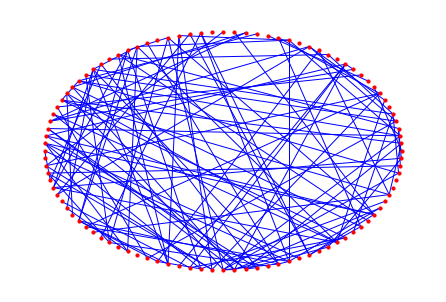

In [91]:
n= 100
m = 125
seed = 3
G = nx.gnm_random_graph(n,m,seed)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b',
       node_size=10)

An obvious algorithm would inspect every triple of vertices, suggesting a $n^3$ runtime. Using fast matrix multiplication, we can do better

In [92]:
A = nx.adjacency_matrix(G)
B = A**2

In [93]:
has_triangle = False

for i in range(n):
    for j in range(i,n):
        if A[i,j] != 0 and B[i,j] != 0:
            has_triangle = True

if has_triangle:
    print('G contains a triangle')
else:
    print('G contains no triangle')

G contains a triangle


In [94]:
triangle_vertices = []
triangle_edges = []

for i in range(n):
    for j in range(i,n):
        if A[i,j] != 0 and B[i,j] != 0:
            triangle_vertices.extend((i,j))
            triangle_edges.append([i,j])

triangle_vertices = set(triangle_vertices)

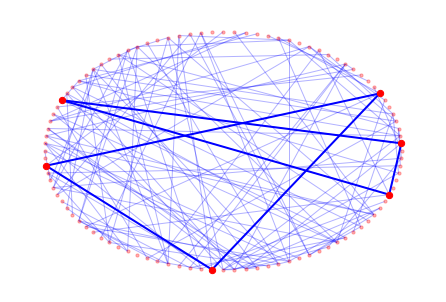

In [117]:
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b',
       node_size=10,alpha=0.3)
nx.draw_networkx_edges(G,pos=nx.circular_layout(G),edge_color='b',width=2,edgelist=triangle_edges)
nx.draw_networkx_nodes(G,pos=nx.circular_layout(G),node_color='r',nodelist=triangle_vertices,node_size=40)
plt.show()